# CAR INSURANCE PREDICTION - Paoloemilio Grande (788661) 🚘🚘🚘
### If you are a car insurance company (or my professor) check out this model! 📚


The 'Car Insurance Claim' dataset provides a comprehensive collection of information related to customers and their interactions with car insurance. It is designed for predictive modelling in a car insurance company and contains demographic features, financial features, driving history and driving records which are here explained:
- **ID:** Unique identifier (PRIMARY KEY).
- **AGE:** Self-explanaitory.
- **GENDER:** Self-explanaitory.
- **RACE:** Self-explanaitory (majority/minority).
- **DRIVING_EXPERIENCE:** Number of years of driving experience.
- **EDUCATION:** Level of education attained by the individual.
- **INCOME:** Social class of customers.
- **CREDIT_SCORE:** Credit score of the individual.
- **VEHICLE_OWNERSHIP:** Indicates whether the individual owns the vehicle (1/0).
- **VEHICLE_YEAR:** Year of manufacture of the vehicle.
- **MARRIED:** Marital status of the individual (1/0).
- **CHILDREN:** Presence of children (1/0).
- **POSTAL_CODE:** Postal code of the individual's residence.
- **ANNUAL_MILEAGE:** Annual mileage driven by the individual.
- **VEHICLE_TYPE:** Type of vehicle being insured (sedan/sport car).
- **SPEEDING_VIOLATIONS:** Number of speeding violations on the individual's driving record.
- **DUIS:** Number of driving under the influence (DUI) incidents on the individual's record.
- **PAST_ACCIDENTS:** Number of past accidents the individual has been involved in.
- **OUTCOME:** Target variable indicating whether the individual is likely to claim car insurance (1) or not (0). This variable is crucial for building a predictive model to help the insurance company assess the risk of a customer filing a claim.

In [1]:
#Importing libraries I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
df = pd.read_csv('/Users/paoloemiliogrande/Desktop/LUISS/DASA/HOMEWORKS/Car_Insurance_Claim.csv')

## EDA 🕵️‍♂️🔍 

Let's understand data, check for integrity, and visualize distributions and relationships



In [3]:
df.head() #Display the first 5 rows

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.tail() #Display the last 5 rows

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [5]:
df.sample(5) #Display 5 random rows

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
27,165623,26-39,male,majority,10-19y,none,poverty,0.294797,1.0,before 2015,1.0,0.0,10238,15000.0,sedan,0,0,1,0.0
953,740034,26-39,female,majority,0-9y,none,working class,0.455111,1.0,before 2015,0.0,0.0,32765,NaN,sedan,0,0,0,1.0
4511,176249,40-64,female,majority,20-29y,high school,upper class,NaN,1.0,before 2015,1.0,1.0,32765,10000.0,sports car,4,0,2,0.0
2003,270333,65+,male,majority,30y+,university,upper class,0.583261,1.0,after 2015,0.0,1.0,10238,9000.0,sedan,5,0,2,0.0
2722,89556,40-64,male,majority,20-29y,high school,upper class,0.730474,0.0,before 2015,1.0,1.0,10238,9000.0,sedan,3,0,5,0.0


In [6]:
print("Shape of the dataset: \n", df.shape) #Display the number of rows and columns
print("------------------------------- \n")
print("Columns of the dataset: \n", df.columns) #Display the columns' names

Shape of the dataset: 
 (10000, 19)
------------------------------- 

Columns of the dataset: 
 Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


In [7]:
df.info(verbose=True) #Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [8]:
print("Missing values: \n", df.isnull().sum()) #Display missing values for each feature

Missing values: 
 ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [9]:
df.describe().T #Display descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,500521.906800,290030.768758,101.000000,249638.500000,501777.000000,753974.500000,999976.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
CHILDREN,10000.0,0.688800,0.463008,0.000000,0.000000,1.000000,1.000000,1.000000
POSTAL_CODE,10000.0,19864.548400,18915.613855,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000


In [10]:
df.duplicated().sum() #Display the number of duplicated rows

0

In [11]:
df.nunique() #Display the number of unique values

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

## Distributions📊📊

Let's see how the variables are distributed graphically and the correlation between them

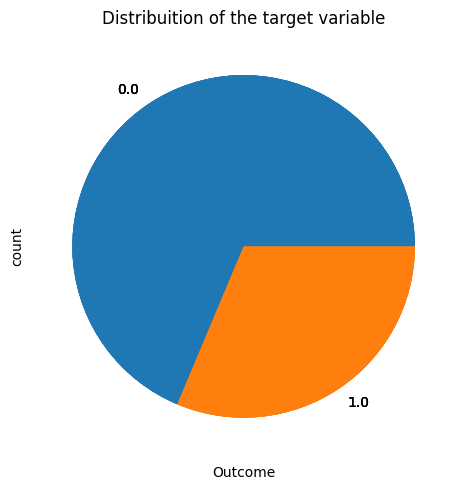

In [12]:
#First of all let's display the distribution of the target variable
plt.figure(figsize=(10, 5))
df["OUTCOME"].value_counts().plot(kind="pie")
df["OUTCOME"].value_counts().plot(kind="pie").set_xlabel("Outcome")
df["OUTCOME"].value_counts().plot(kind="pie").set_ylabel("Count")
df["OUTCOME"].value_counts().plot(kind="pie").set_title("Distribuition of the target variable")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Education')

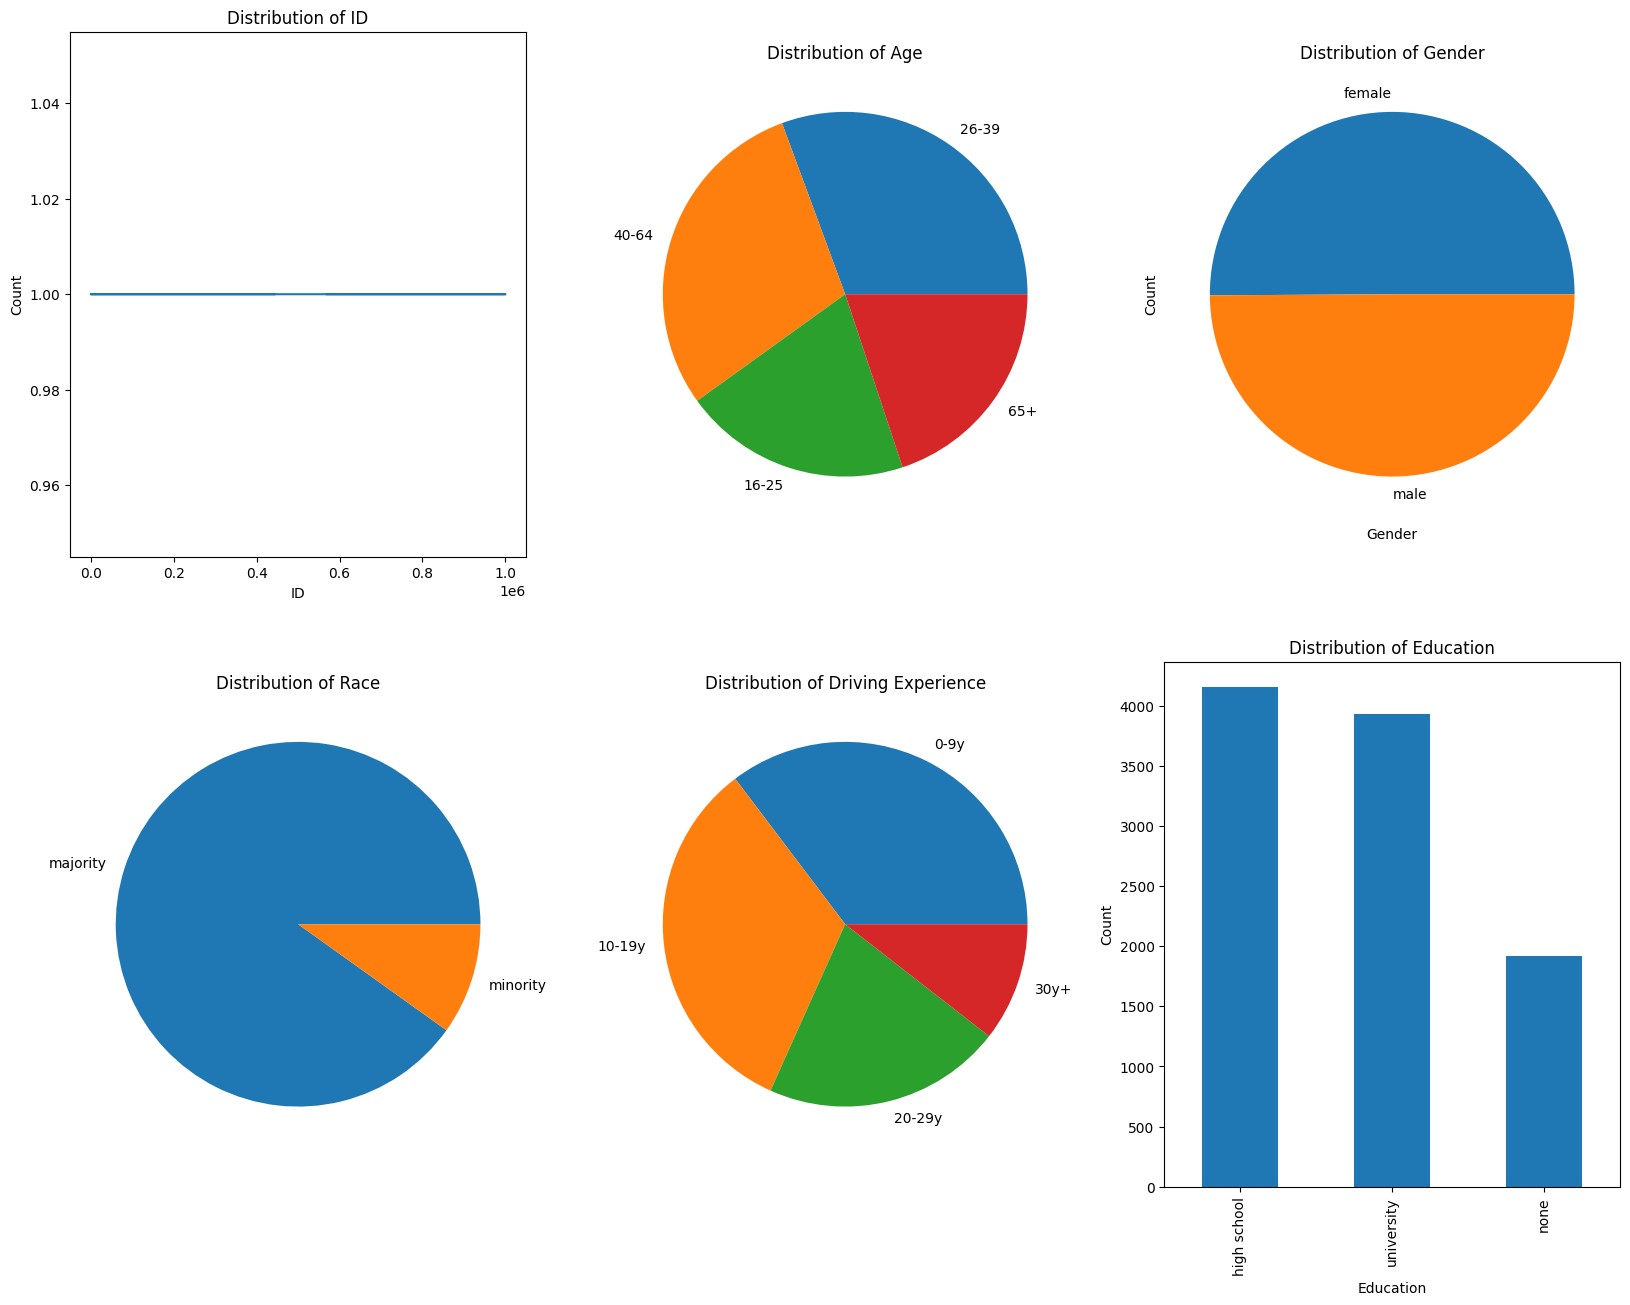

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
#For the first six features: 'ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION'

#DISTRIBUTION OF ID
df["ID"].value_counts().plot(kind="line", ax=axes[0, 0])
axes[0, 0].set_xlabel("ID")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Distribution of ID")

#DISTRIBUTION OF AGE
df["AGE"].value_counts().plot(kind="pie", ax=axes[0,1])
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution of Age")

#DISTRIBUTION OF GENDER
df["GENDER"].value_counts().plot(kind="pie", ax=axes[0,2])
axes[0,2].set_xlabel("Gender")
axes[0,2].set_ylabel("Count")
axes[0,2].set_title("Distribution of Gender")

#DISTRIBUTION OF RACE
df["RACE"].value_counts().plot(kind="pie", ax=axes[1,0])
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution of Race")

#DISTRIBUTION OF DRIVING EXPERIENCE
df["DRIVING_EXPERIENCE"].value_counts().plot(kind="pie", ax=axes[1,1])
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution of Driving Experience")

#DISTRIBUTION OF EDUCATION
df["EDUCATION"].value_counts().plot(kind="bar", ax=axes[1,2])
axes[1,2].set_xlabel("Education")
axes[1,2].set_ylabel("Count")
axes[1,2].set_title("Distribution of Education")

Text(0.5, 1.0, 'Distribution of Children')

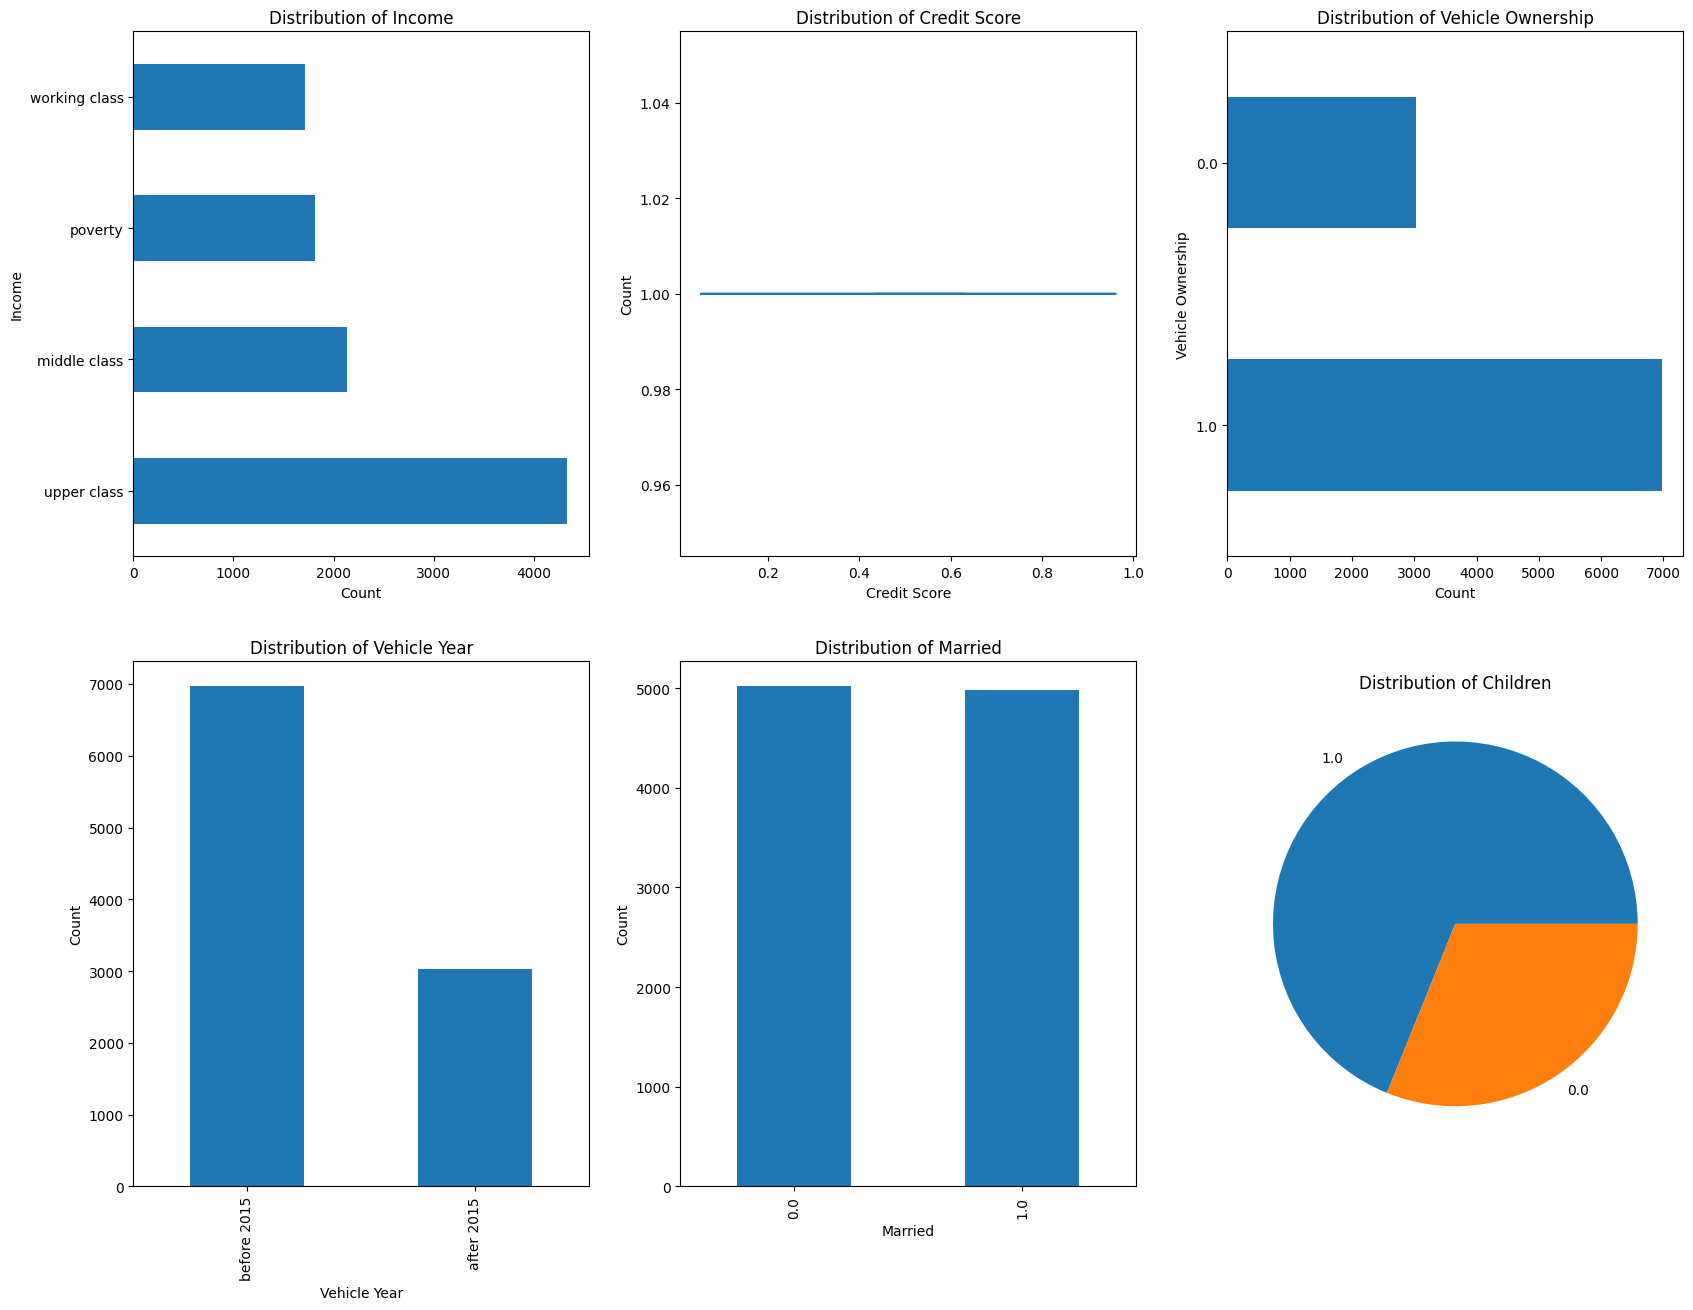

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
#For the next six features: 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN'

#DISTRIBUTION OF INCOME
df["INCOME"].value_counts().plot(kind="barh", ax=axes[0,0])
axes[0,0].set_xlabel("Count")
axes[0,0].set_ylabel("Income")
axes[0,0].set_title("Distribution of Income")

#DISTRIBUTION OF CREDIT SCORE
df["CREDIT_SCORE"].value_counts().plot(kind="line", ax=axes[0,1])
axes[0,1].set_xlabel("Credit Score")
axes[0,1].set_ylabel("Count")
axes[0,1].set_title("Distribution of Credit Score")

#DISTRIBUTION OF VEHICLE OWNERSHIP
df["VEHICLE_OWNERSHIP"].value_counts().plot(kind="barh", ax=axes[0,2])
axes[0,2].set_xlabel("Count")
axes[0,2].set_ylabel("Vehicle Ownership")
axes[0,2].set_title("Distribution of Vehicle Ownership")

#DISTRIBUTION OF VEHICLE YEAR
df["VEHICLE_YEAR"].value_counts().plot(kind="bar", ax=axes[1,0])
axes[1,0].set_xlabel("Vehicle Year")
axes[1,0].set_ylabel("Count")
axes[1,0].set_title("Distribution of Vehicle Year")

#DISTRIBUTION OF MARRIED
df["MARRIED"].value_counts().plot(kind="bar", ax=axes[1,1])
axes[1,1].set_xlabel("Married")
axes[1,1].set_ylabel("Count")
axes[1,1].set_title("Distribution of Married")

#DISTRIBUTION OF CHILDREN
df["CHILDREN"].value_counts().plot(kind="pie", ax=axes[1,2])
axes[1,2].set_ylabel("")
axes[1,2].set_title("Distribution of Children")

Text(0.5, 1.0, 'Distribution of Past Accidents')

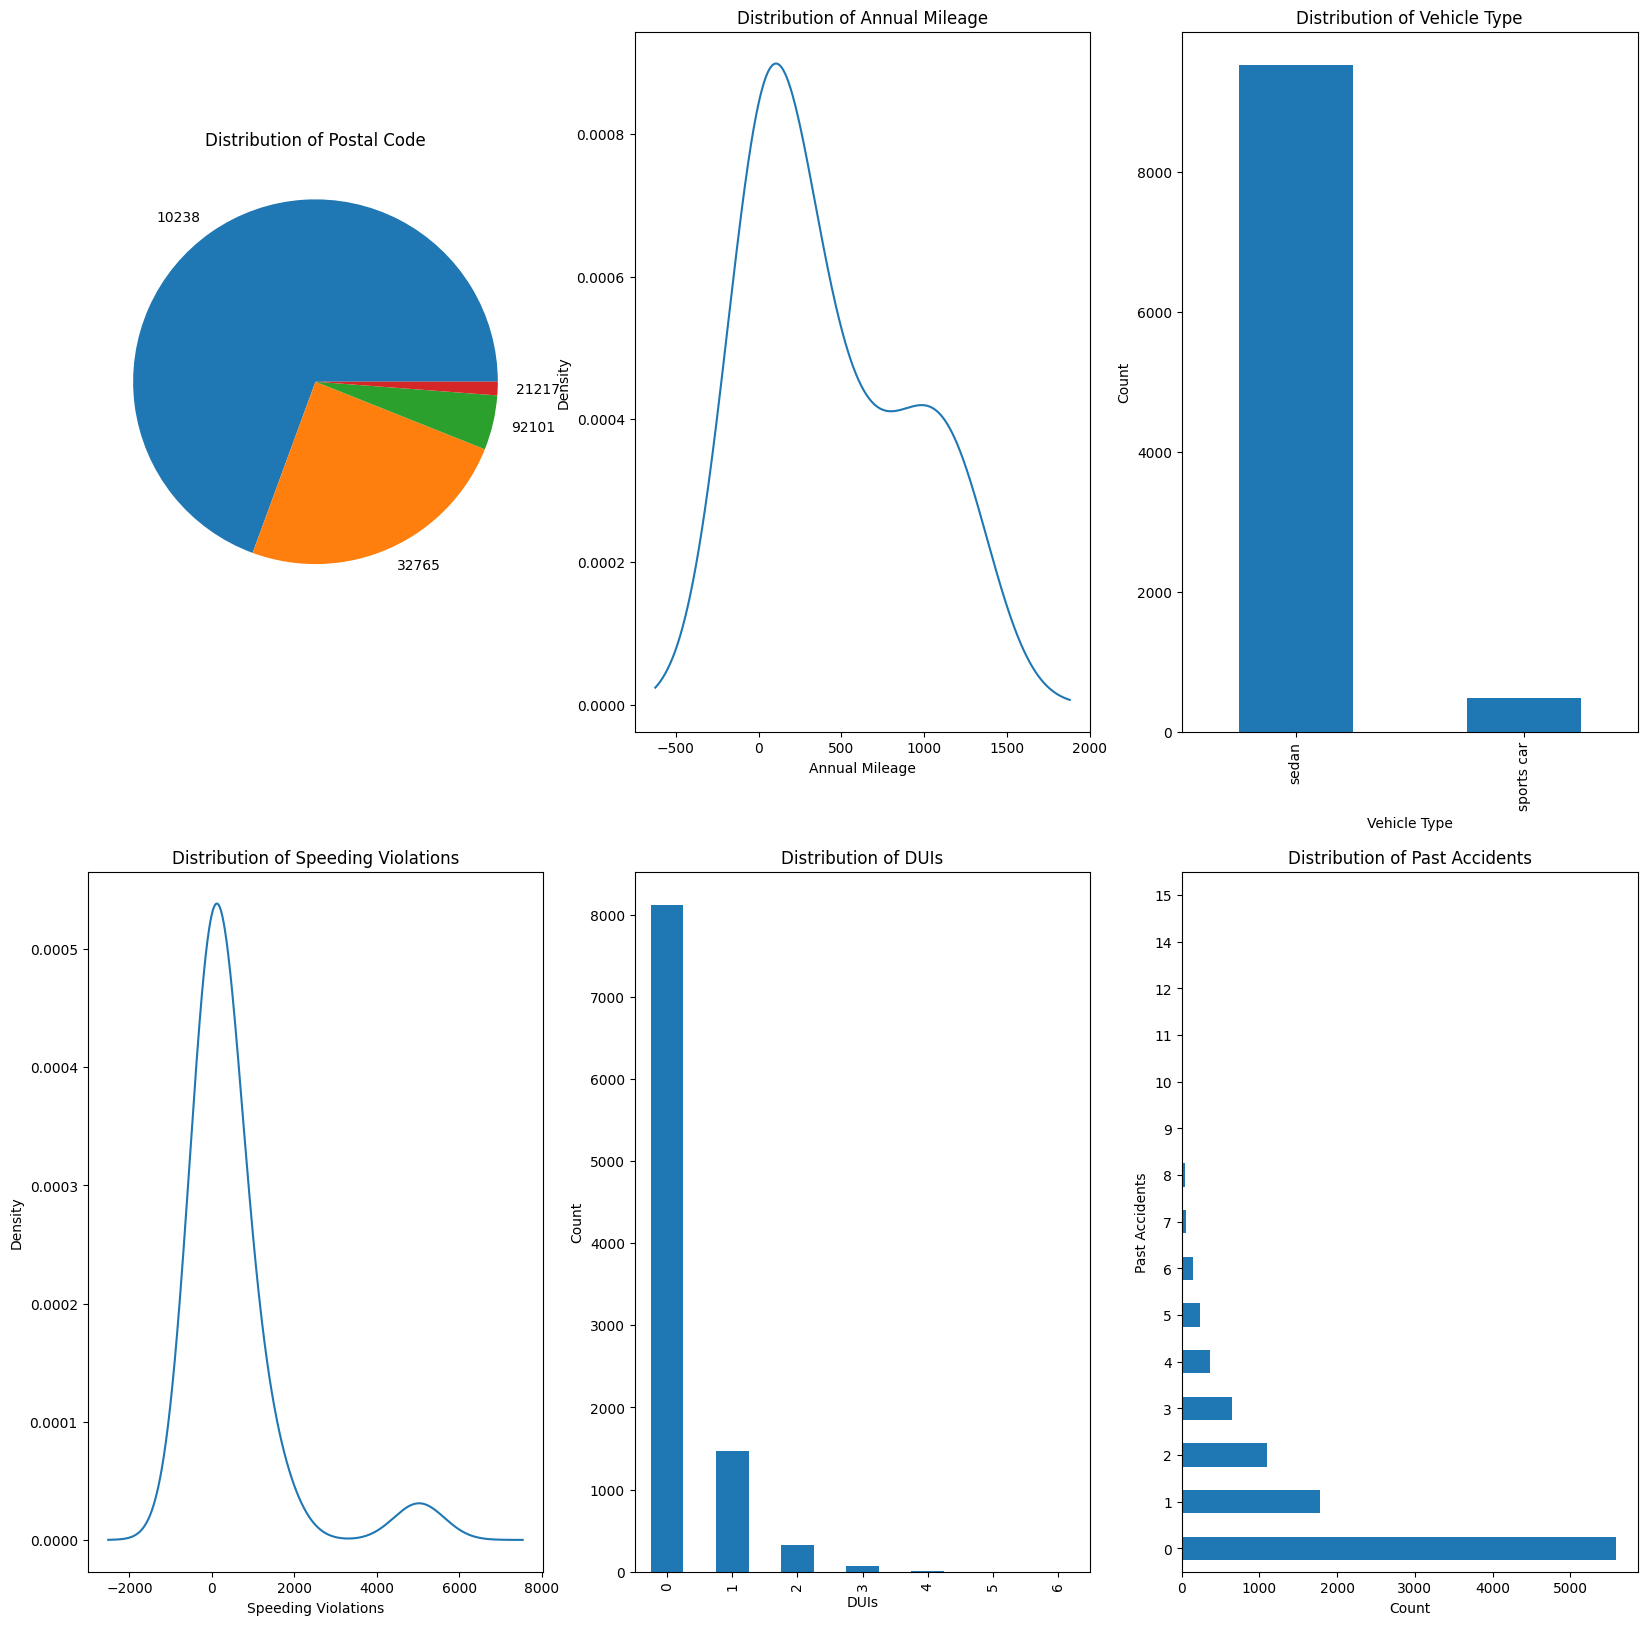

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
#For the last six features: 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE','SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'

#DISTRIBUTION OF POSTAL CODE
df["POSTAL_CODE"].value_counts().plot(kind="pie", ax=axes[0,0])
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution of Postal Code")

#DISTRIBUTION OF ANNUAL MILEAGE
df["ANNUAL_MILEAGE"].value_counts().plot(kind="density", ax=axes[0,1])
axes[0,1].set_xlabel("Annual Mileage")
axes[0,1].set_ylabel("Density")
axes[0,1].set_title("Distribution of Annual Mileage")

#DISTRIBUTION OF VEHICLE TYPE
df["VEHICLE_TYPE"].value_counts().plot(kind="bar", ax=axes[0,2])
axes[0,2].set_xlabel("Vehicle Type")
axes[0,2].set_ylabel("Count")
axes[0,2].set_title("Distribution of Vehicle Type")

#DISTRIBUTION OF SPEEDING VIOLATIONS
df["SPEEDING_VIOLATIONS"].value_counts().plot(kind="density", ax=axes[1,0])
axes[1,0].set_xlabel("Speeding Violations")
axes[1,0].set_ylabel("Density")
axes[1,0].set_title("Distribution of Speeding Violations")

#DISTRIBUTION OF DUIS
df["DUIS"].value_counts().plot(kind="bar", ax=axes[1,1])
axes[1,1].set_xlabel("DUIs")
axes[1,1].set_ylabel("Count")
axes[1,1].set_title("Distribution of DUIs")

#DISTRIBUTION OF PAST ACCIDENTS
df["PAST_ACCIDENTS"].value_counts().plot(kind="barh", ax=axes[1,2])
axes[1,2].set_xlabel("Count")
axes[1,2].set_ylabel("Past Accidents")
axes[1,2].set_title("Distribution of Past Accidents")

<Axes: >

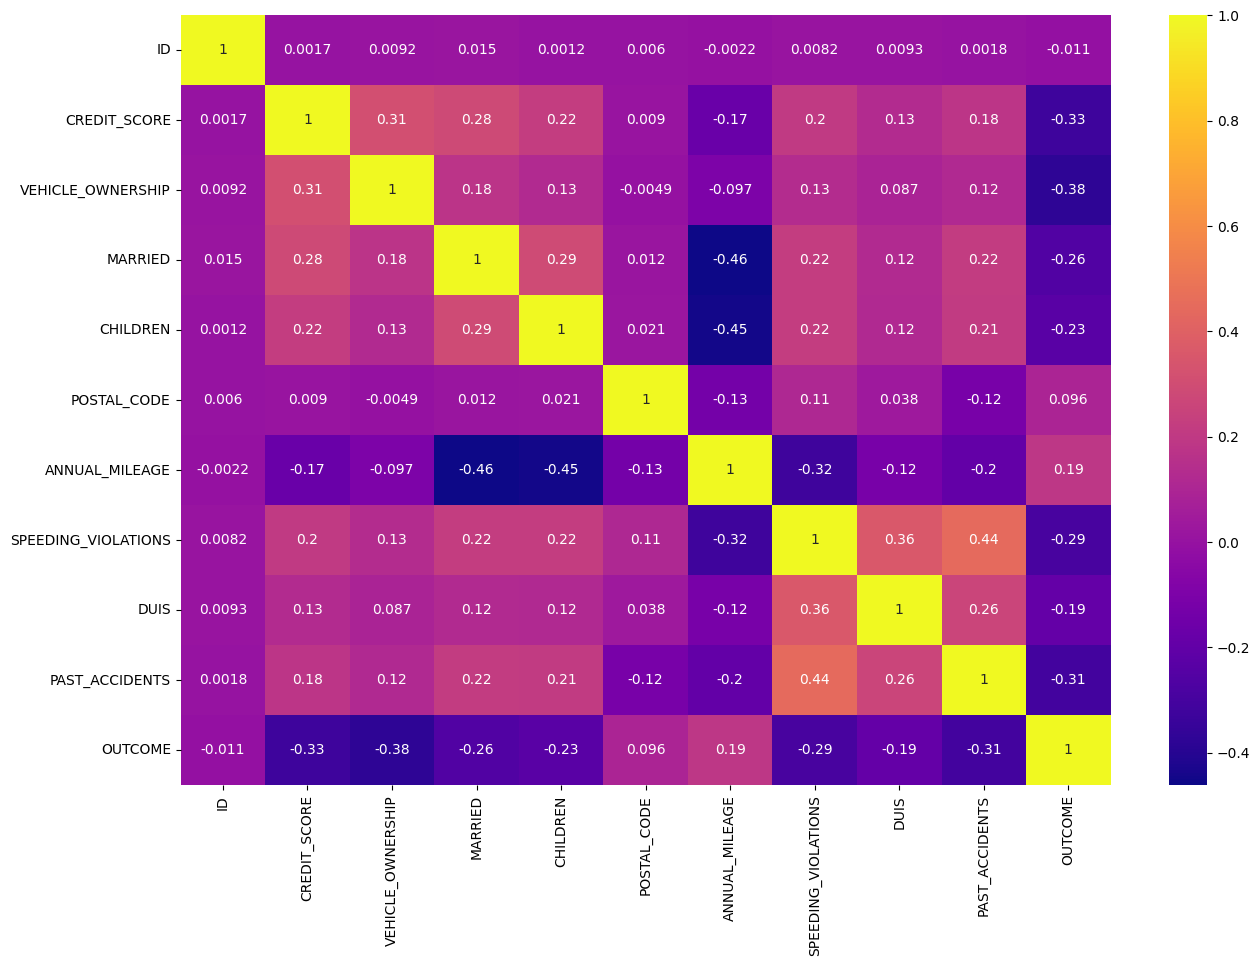

In [16]:
#Display the correlation matrix
corr = df.corr(numeric_only=True)
corr
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="plasma")

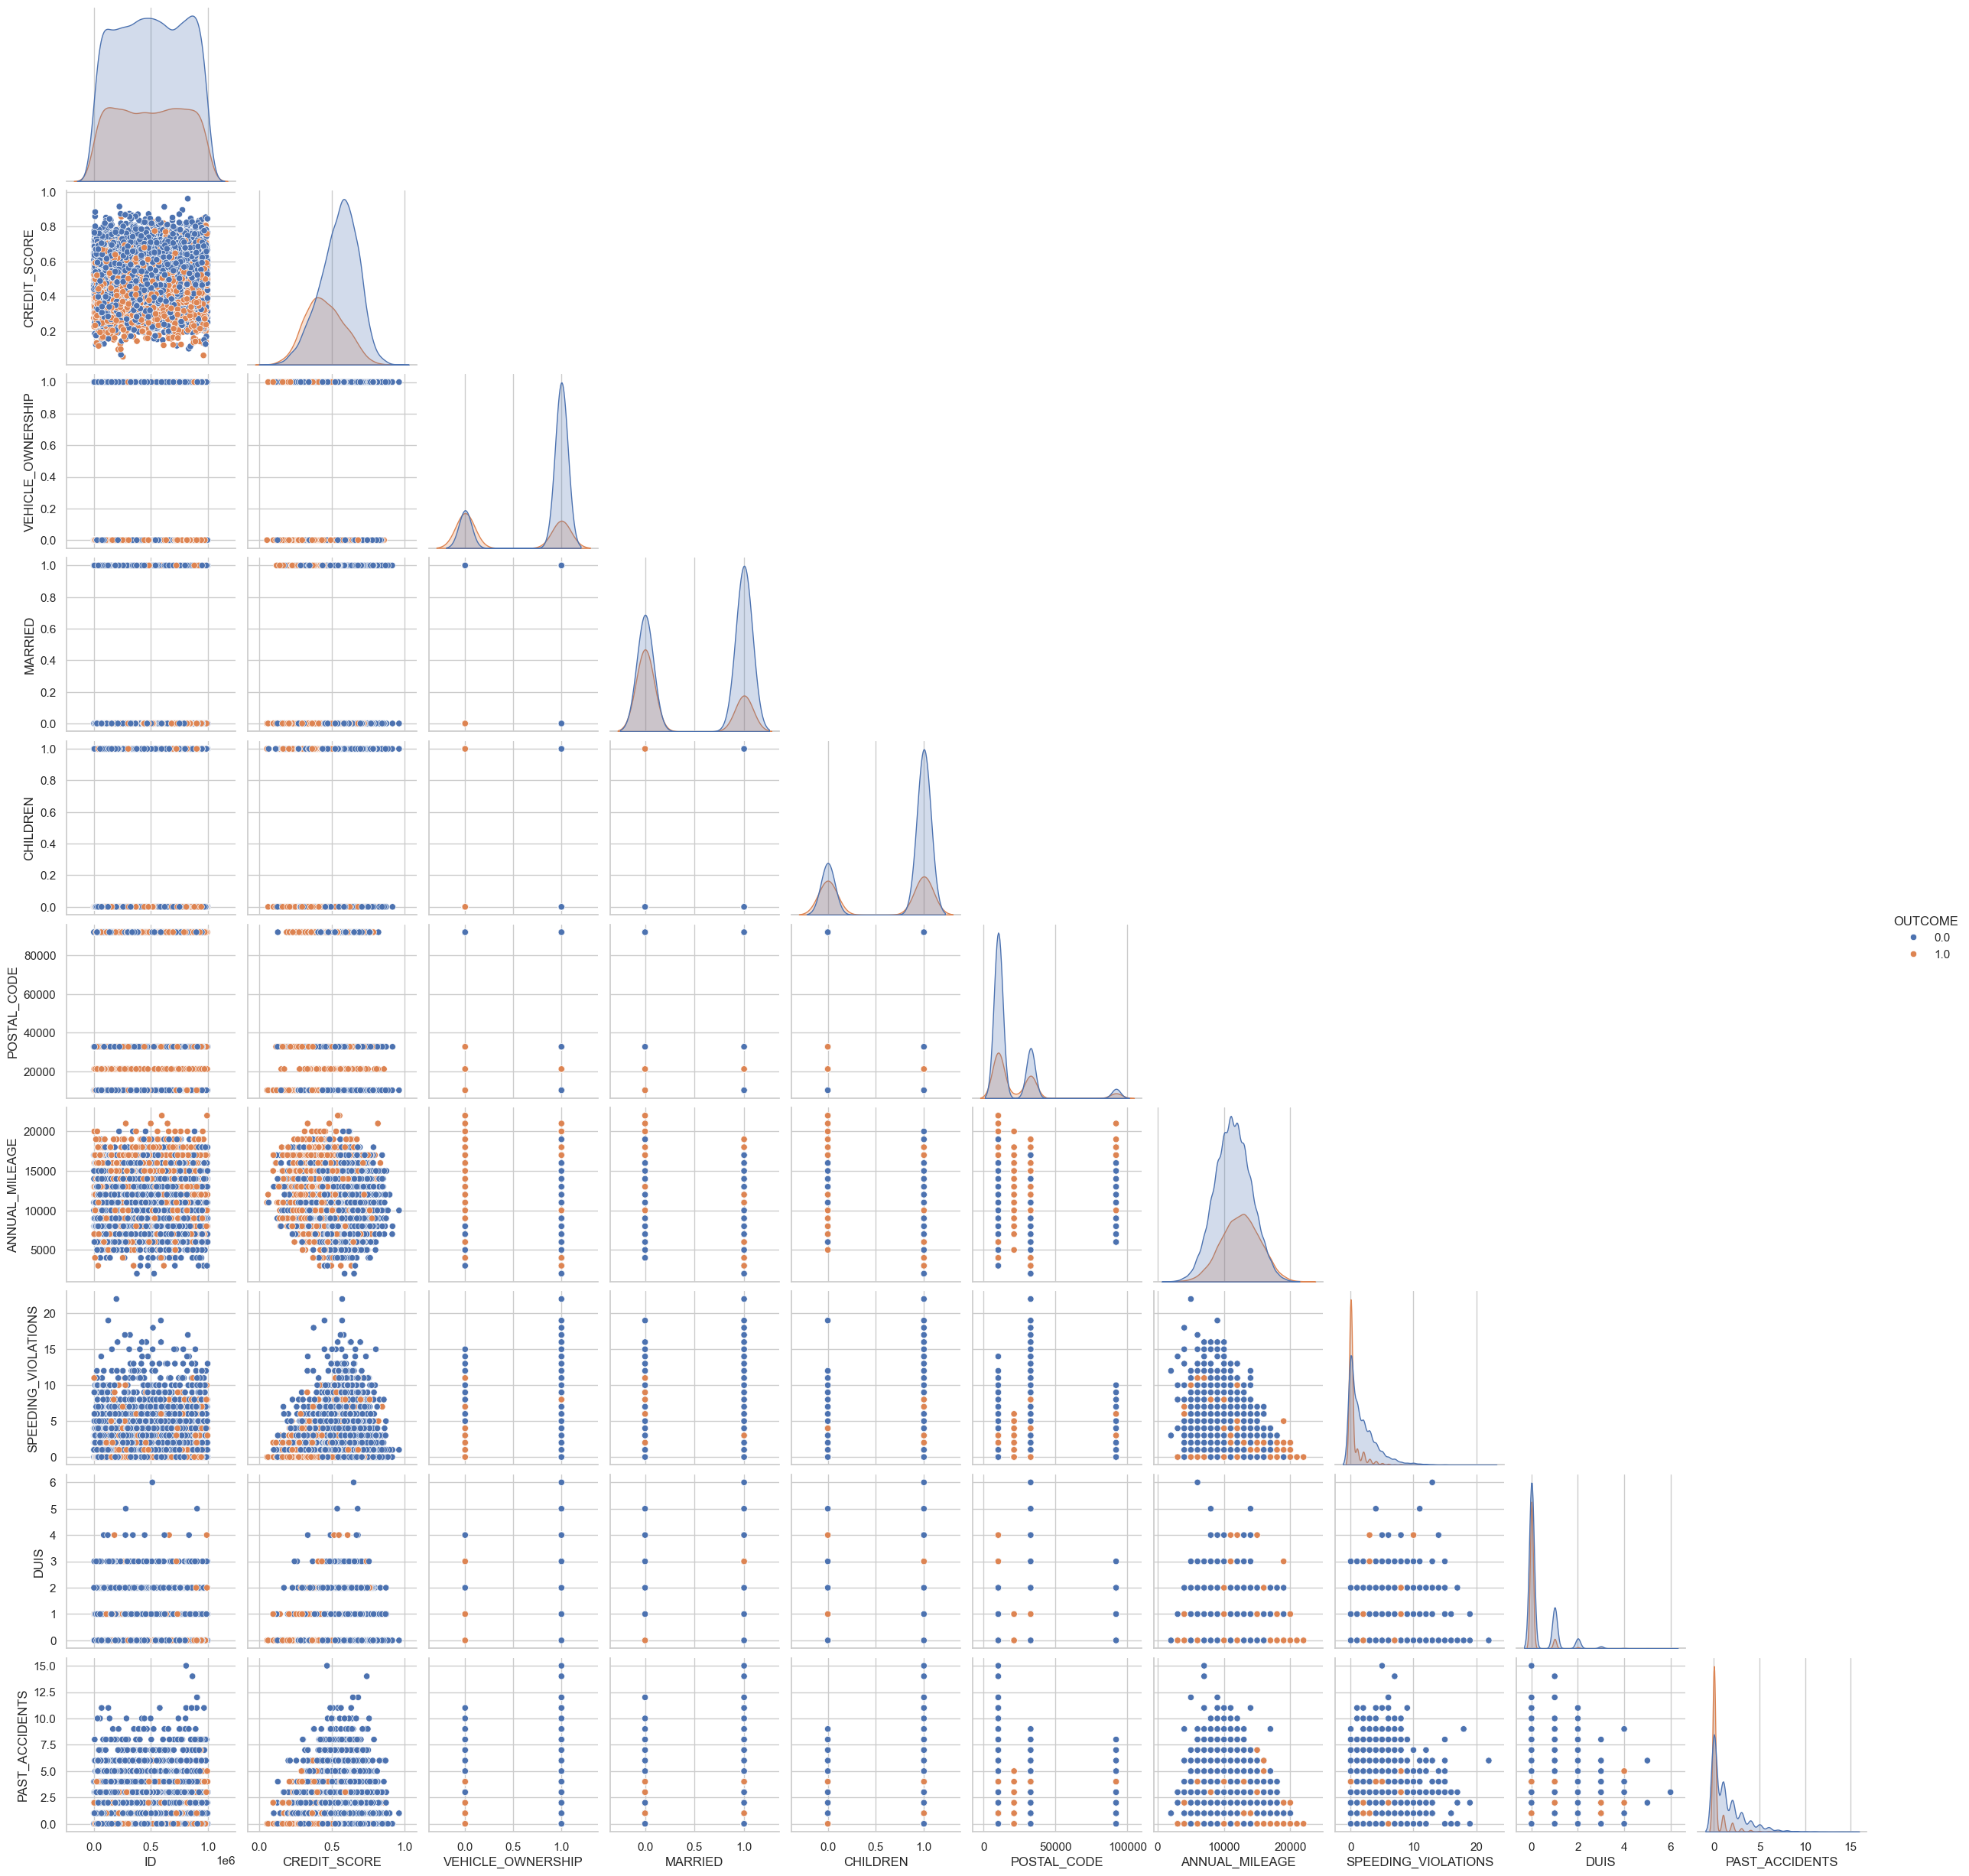

In [17]:
#Display the pairplot to see the relationships between the target variable and the features
sns.set(style="whitegrid")
sns.pairplot(df, hue="OUTCOME", corner=True)

<Axes: xlabel='PAST_ACCIDENTS', ylabel='Count'>

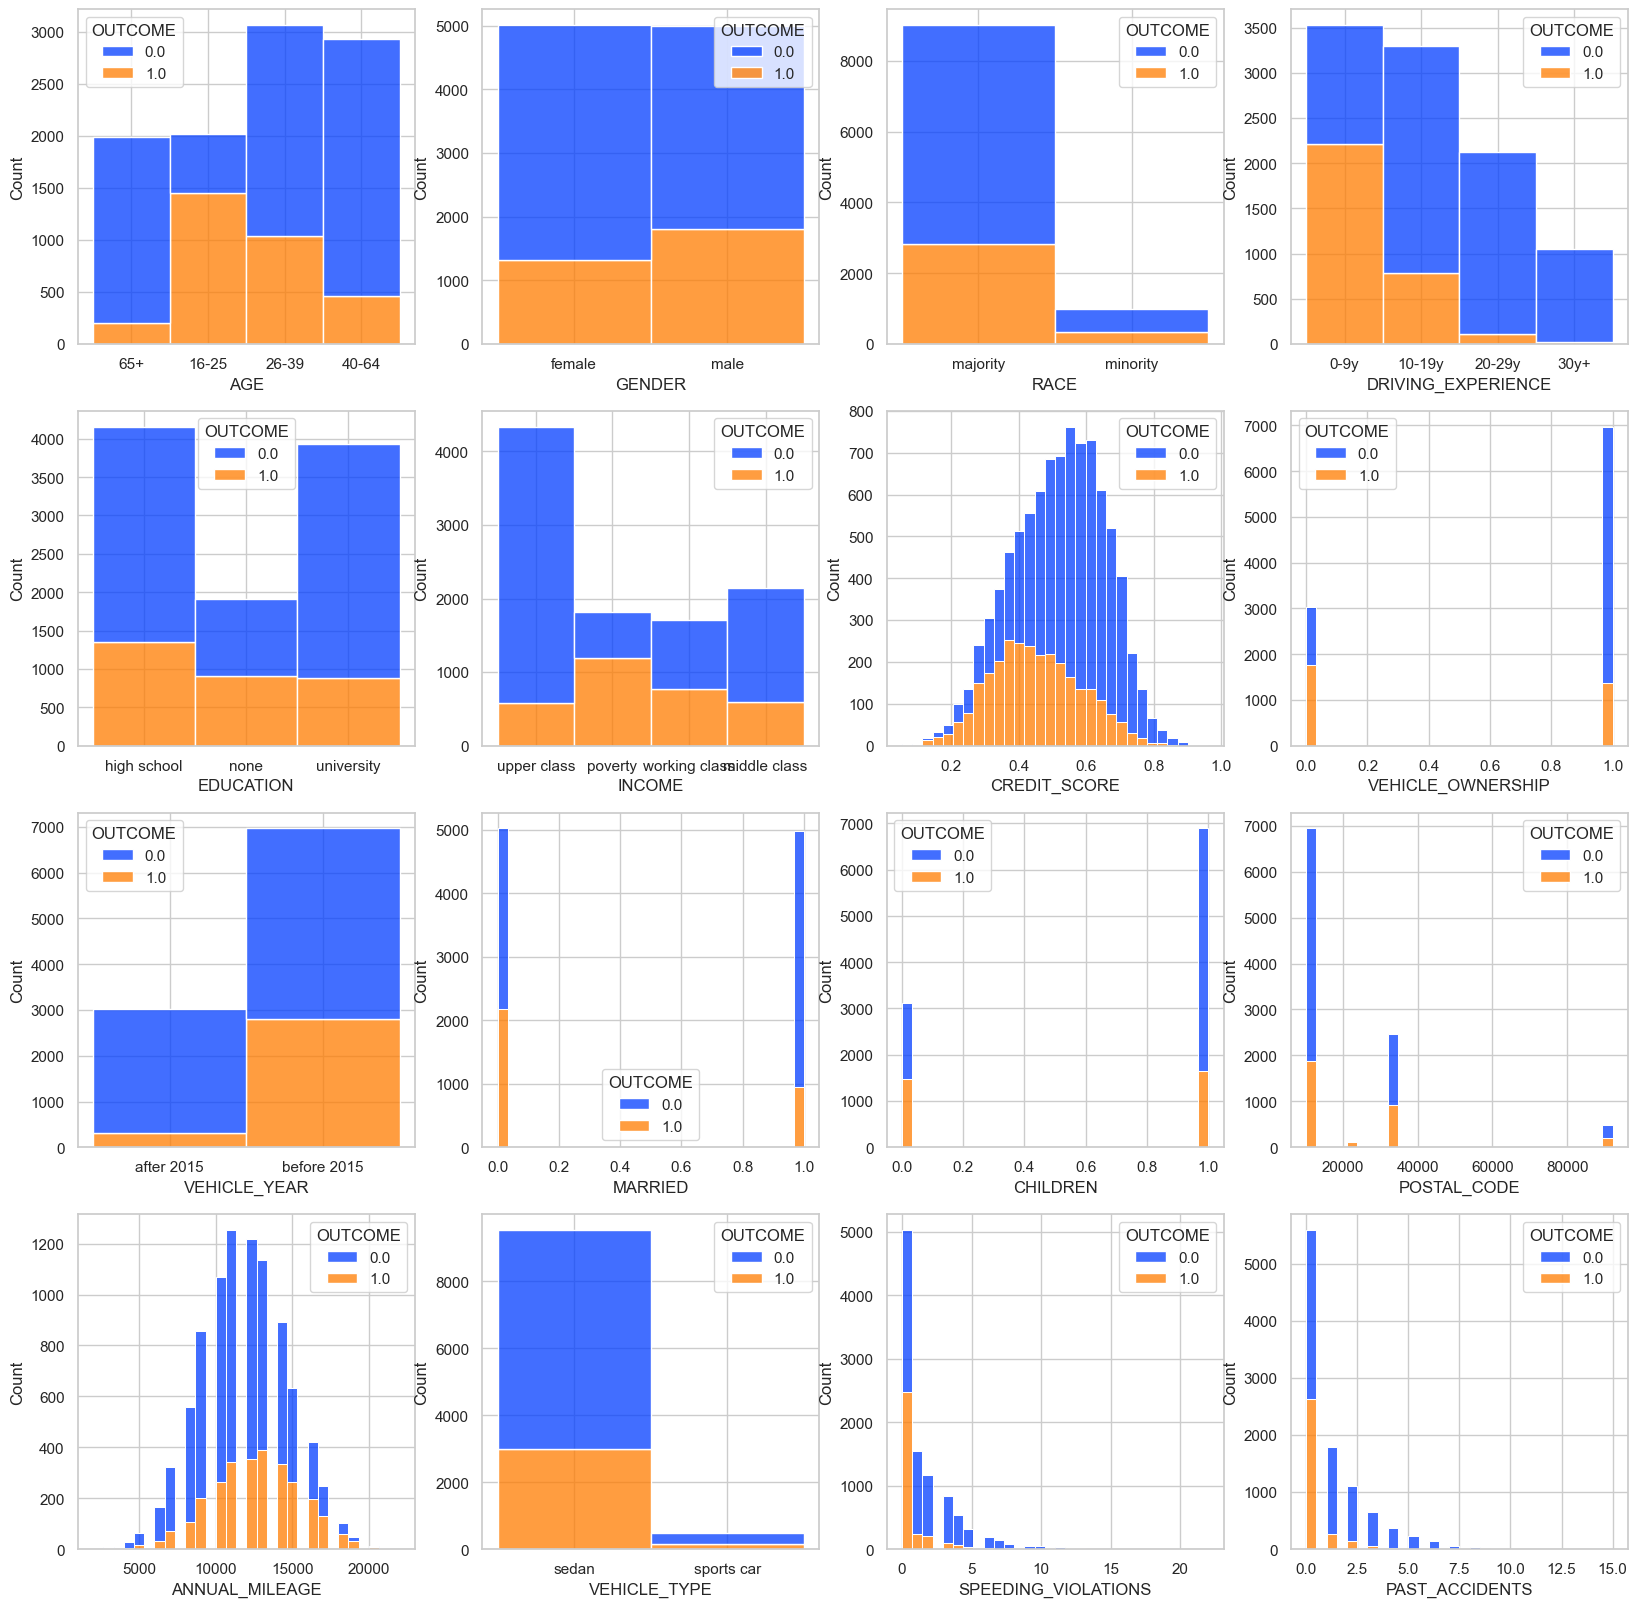

In [18]:
#Let's plot some other features with the outcome to better understand the implications of the target variable
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

sns.histplot(df, x="AGE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[0,0], palette="bright") #Outcome vs Age

sns.histplot(df, x="GENDER", hue="OUTCOME", multiple="stack", bins=30, ax=axes[0,1], palette="bright") #Outcome vs Gender

sns.histplot(df, x="RACE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[0,2], palette="bright") #Outcome vs Race

sns.histplot(df, x="DRIVING_EXPERIENCE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[0,3], palette="bright") #Outcome vs Driving Experience

sns.histplot(df, x="EDUCATION", hue="OUTCOME", multiple="stack", bins=30, ax=axes[1,0], palette="bright") #Outcome vs Education

sns.histplot(df, x="INCOME", hue="OUTCOME", multiple="stack", bins=30, ax=axes[1,1], palette="bright") #Outcome vs Income

sns.histplot(df, x="CREDIT_SCORE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[1,2], palette="bright") #Outcome vs Credit Score

sns.histplot(df, x="VEHICLE_OWNERSHIP", hue="OUTCOME", multiple="stack", bins=30, ax=axes[1,3], palette="bright") #Outcome vs Vehicle Ownership

sns.histplot(df, x="VEHICLE_YEAR", hue="OUTCOME", multiple="stack", bins=30, ax=axes[2,0], palette="bright") #Outcome vs Vehicle Year

sns.histplot(df, x="MARRIED", hue="OUTCOME", multiple="stack", bins=30, ax=axes[2,1], palette="bright") #Outcome vs Married

sns.histplot(df, x="CHILDREN", hue="OUTCOME", multiple="stack", bins=30, ax=axes[2,2], palette="bright") #Outcome vs Children

sns.histplot(df, x="POSTAL_CODE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[2,3], palette="bright") #Outcome vs Postal Code

sns.histplot(df, x="ANNUAL_MILEAGE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[3,0], palette="bright") #Outcome vs Annual Mileage

sns.histplot(df, x="VEHICLE_TYPE", hue="OUTCOME", multiple="stack", bins=30, ax=axes[3,1], palette="bright") #Outcome vs Vehicle Type

sns.histplot(df, x="SPEEDING_VIOLATIONS", hue="OUTCOME", multiple="stack", bins=30, ax=axes[3,2], palette="bright") #Outcome vs Speeding Violations

sns.histplot(df, x="PAST_ACCIDENTS", hue="OUTCOME", multiple="stack", bins=30, ax=axes[3,3], palette="bright") #Outcome vs Past Accidents

Text(0.5, 1.0, 'Distribution of Income vs DUIs')

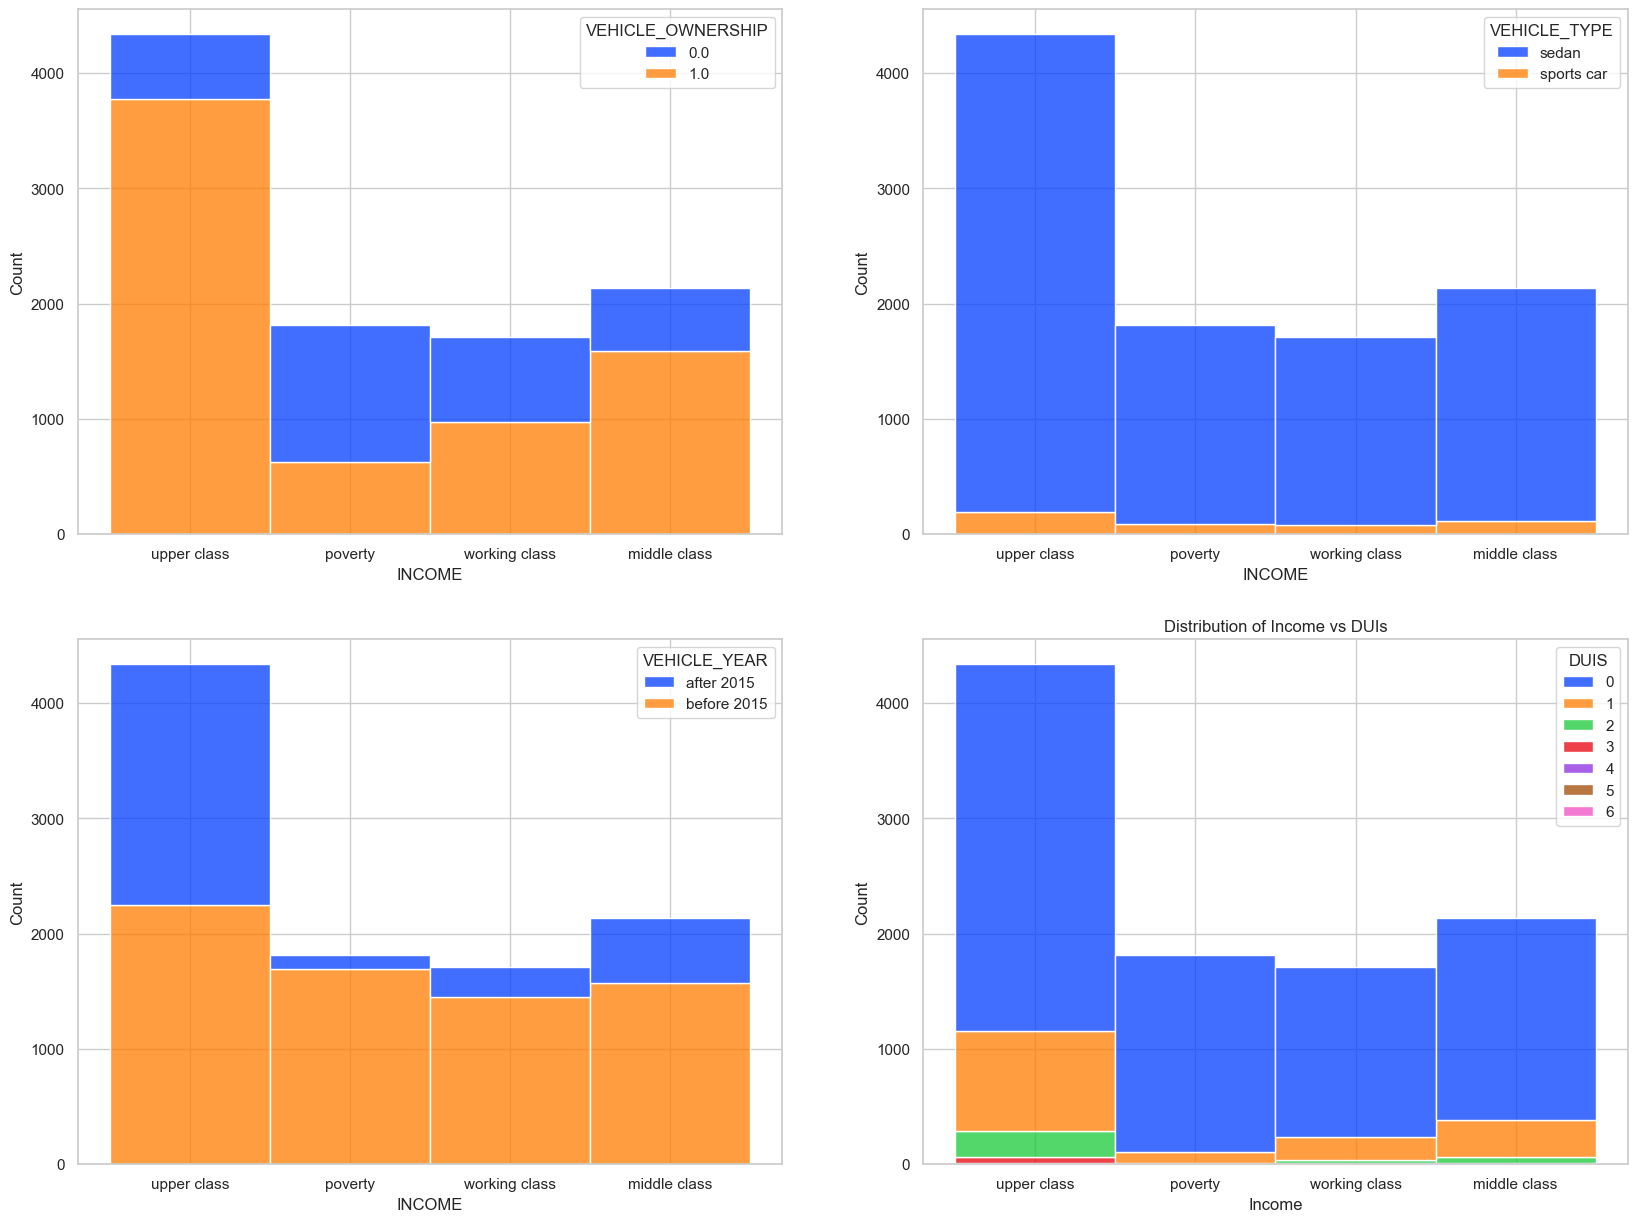

In [19]:
#Let's see how income affects some other variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

#Display distribution of the income vs vehicle ownership
sns.histplot(df, x="INCOME", hue="VEHICLE_OWNERSHIP", multiple="stack", bins=30, ax=axes[0,0], palette="bright")
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income vs Vehicle Ownership")

#Display distribution of the income vs vehicle type
sns.histplot(df, x="INCOME", hue="VEHICLE_TYPE", multiple="stack", bins=30, ax=axes[0,1], palette="bright")
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income vs Vehicle Type")

#Display distribution of the income vs vehicle year
sns.histplot(df, x="INCOME", hue="VEHICLE_YEAR", multiple="stack", bins=30, ax=axes[1,0], palette="bright")
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income vs Vehicle Year")

#Display distribution of the income vs DUIs
sns.histplot(df, x="INCOME", hue="DUIS", multiple="stack", bins=30, ax=axes[1,1], palette="bright")
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income vs DUIs")

Text(0.5, 1.0, 'Distribution of Postal Code vs Outcome')

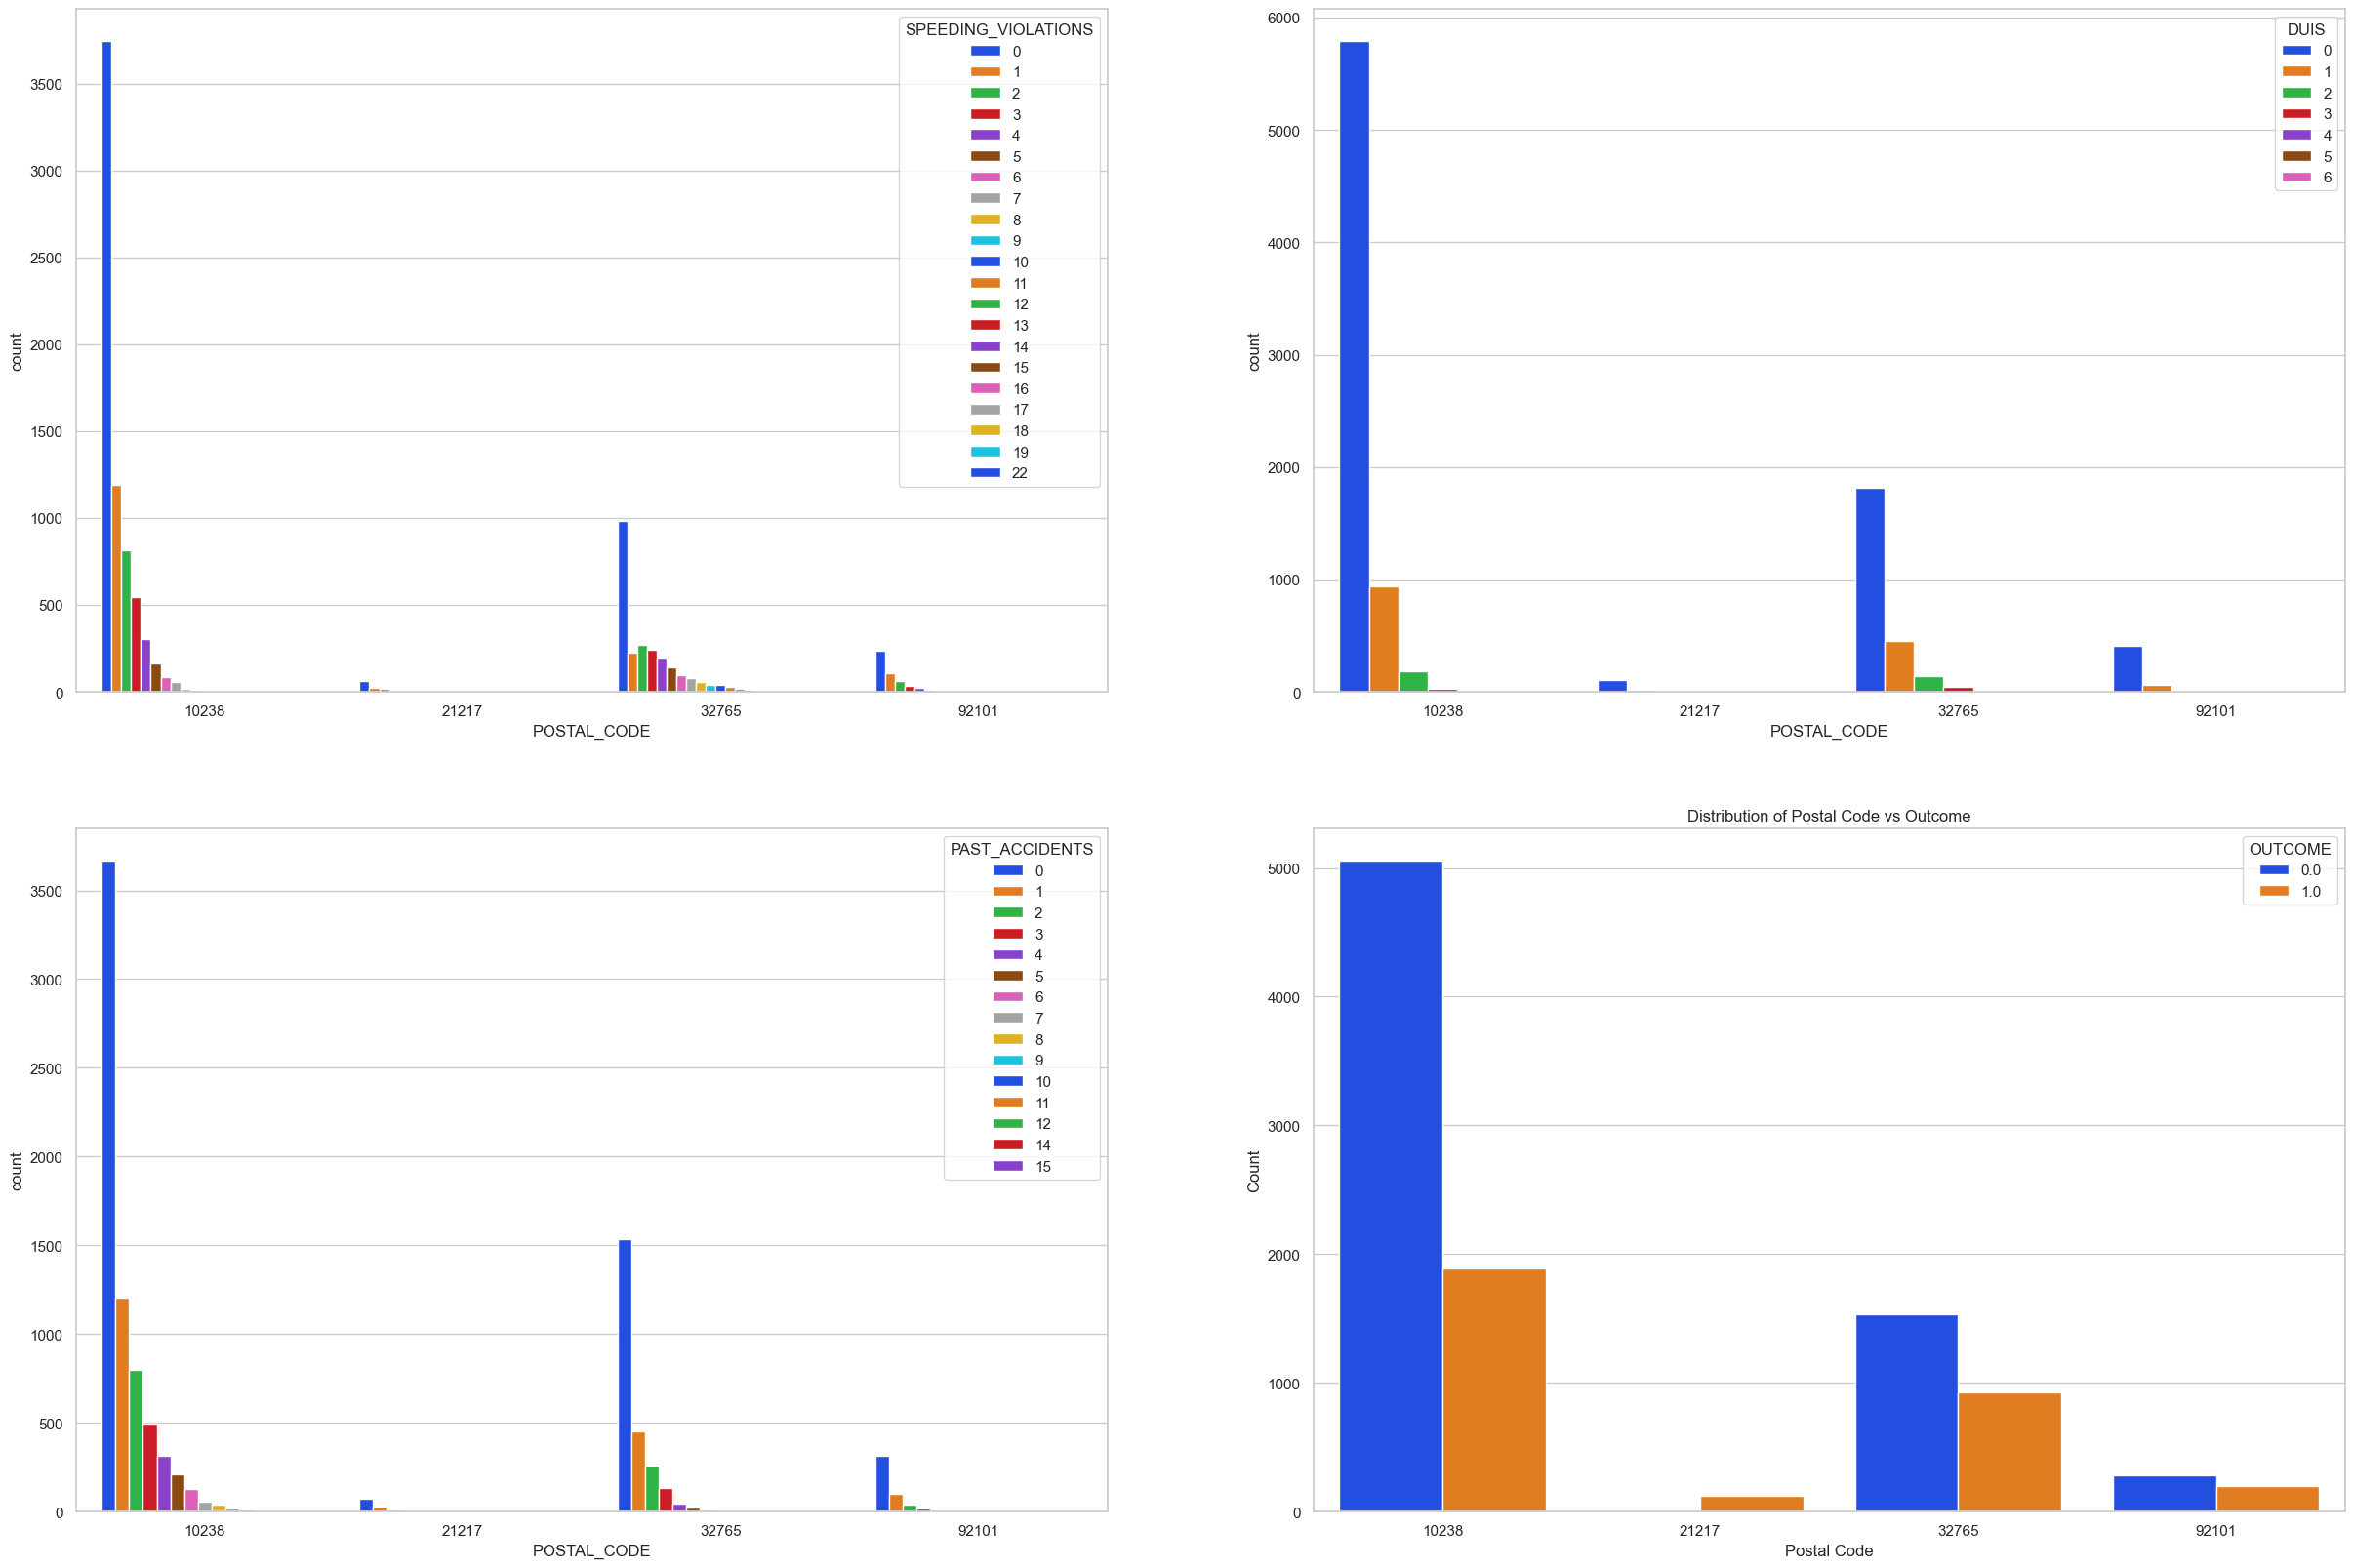

In [20]:
#Now let's analyze how the postal code affects the driving behavior
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))

#Display distribution of the postal code vs speding violations
sns.countplot(x="POSTAL_CODE", hue="SPEEDING_VIOLATIONS", data=df, ax=axes[0,0], palette="bright")
plt.xlabel("Postal Code")
plt.ylabel("Count")
plt.title("Distribution of Postal Code vs Speeding Violations")

#Display distribution of the postal code vs DUIs
sns.countplot(x="POSTAL_CODE", hue="DUIS", data=df, ax=axes[0,1], palette="bright")
plt.xlabel("Postal Code")
plt.ylabel("Count")
plt.title("Distribution of Postal Code vs DUIs")

#Display distribution of the postal code vs past accidents
sns.countplot(x="POSTAL_CODE", hue="PAST_ACCIDENTS", data=df, ax=axes[1,0], palette="bright")
plt.xlabel("Postal Code")
plt.ylabel("Count")
plt.title("Distribution of Postal Code vs Past Accidents")

#Display distribution of the postal code vs Outcome
sns.countplot(x="POSTAL_CODE", hue="OUTCOME", data=df, ax=axes[1,1], palette="bright")
plt.xlabel("Postal Code")
plt.ylabel("Count")
plt.title("Distribution of Postal Code vs Outcome")

## FEATURE ENGINEERING 🛠🔩

- Missing Values / Outliers
- Transforming categorical variables

### ADDRESSING MISSING VALUES🧩🧩

Thanks to the EDA we know that there are missing values in the following features:
- Credit Score
- Annual Mileage 

Since they are both numerical, to fill the NaNs we should first understand their distribution and we should ask for the presence of outliers in order to not introduce bias. 

In [21]:
import statsmodels.api as sm

/var/folders/tm/r77r77ln7ysbqnt4p3zc7ny80000gn/T/ipykernel_37977/794941435.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CREDIT_SCORE'], shade=True, color='green')


Text(0.5, 1.0, 'Kernel Density Estimation Plot of Credit Score')

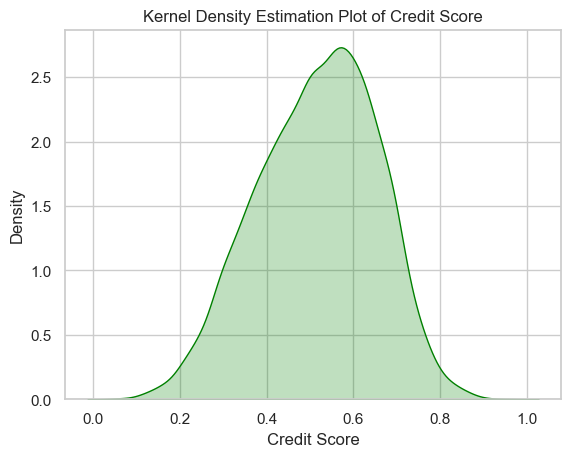

In [22]:
#Let's plot the Kernel Density Estimation of the Credit Score
sns.kdeplot(df['CREDIT_SCORE'], shade=True, color='green')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of Credit Score')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


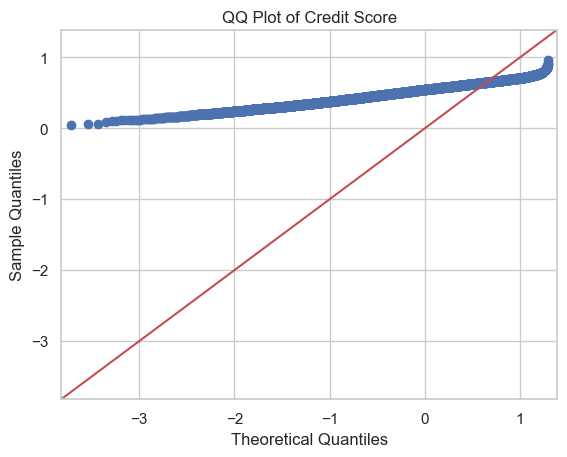

In [23]:
#Using the QQplot to check if the credit score is normally distributed
sm.qqplot(df['CREDIT_SCORE'], line='45', color='red')
plt.title('QQ Plot of Credit Score')
plt.show()

/var/folders/tm/r77r77ln7ysbqnt4p3zc7ny80000gn/T/ipykernel_37977/3078693084.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ANNUAL_MILEAGE'], shade=True, color='green')


Text(0.5, 1.0, 'Kernel Density Estimation Plot of Annual Mileage')

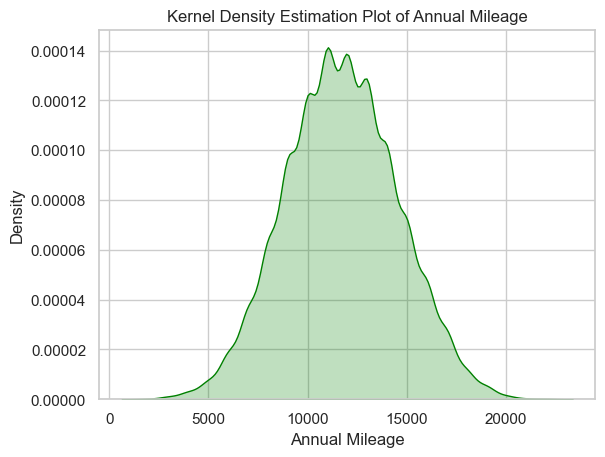

In [24]:
#Let's plot the Kernel Density Estimation of the Annual Mileage
sns.kdeplot(df['ANNUAL_MILEAGE'], shade=True, color='green')
plt.xlabel('Annual Mileage')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot of Annual Mileage')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


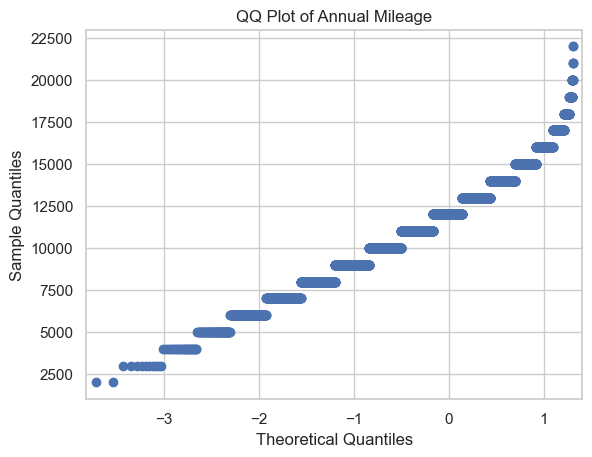

In [25]:
#Using the QQplot to check if the annual mileage is normally distributed
sm.qqplot(df['ANNUAL_MILEAGE'], line='s', color='red')
plt.title('QQ Plot of Annual Mileage')
plt.show()

In [26]:
#Let's check the presence of outliers with the Z-score method for Credit Score
from scipy import stats

treshold = 2
z_scores = stats.zscore(df["CREDIT_SCORE"])
outliers = np.where(z_scores > treshold)
print("There are {} outliers in this variable".format(len(outliers[0]))) #Display the number of outliers

There are 0 outliers in this variable


In [27]:
#Let's check the presence of outliers with the Z-score method for Annual Mileage
treshold = 2
z_scores = stats.zscore(df["ANNUAL_MILEAGE"])
outliers = np.where(z_scores > treshold)
print("There are {} outliers in this variable".format(len(outliers[0]))) #Display the number of outliers

There are 0 outliers in this variable


From what I could learn thanks these lines of codes I'll definitely chose the median to fill the NaNs.

In [28]:
#Filling the missing values with the median
df["CREDIT_SCORE"].fillna(df["CREDIT_SCORE"].median(), inplace=True)
df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].median(), inplace=True)
print("Missing values: \n", df.isnull().sum()) #Display missing values for each feature

Missing values: 
 ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


### TRASFORM CATEGORICAL VARIABLES 🔠 🔜 🔢 🔝

In [29]:
#Loading libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder 

In [30]:
#Ordinal encoding for: 'AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR'
df["AGE"] = OrdinalEncoder().fit_transform(df["AGE"].values.reshape(-1, 1))
df["DRIVING_EXPERIENCE"] = OrdinalEncoder().fit_transform(df["DRIVING_EXPERIENCE"].values.reshape(-1, 1))
df["EDUCATION"] = OrdinalEncoder(categories=[['none', 'high school', 'university']]).fit_transform(df["EDUCATION"].values.reshape(-1, 1))
df["INCOME"] = OrdinalEncoder(categories=[["poverty", "working class", "middle class", "upper class"]]).fit_transform(df["INCOME"].values.reshape(-1, 1))
df["VEHICLE_YEAR"] = OrdinalEncoder(categories=[["before 2015", "after 2015"]]).fit_transform(df["VEHICLE_YEAR"].values.reshape(-1, 1))
OrdinalEncoder().categories

'auto'

In [31]:
df.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
2623,138404,3.0,male,majority,3.0,1.0,2.0,0.525033,1.0,0.0,0.0,1.0,10238,14000.0,sedan,3,0,3,0.0
8480,859164,2.0,male,majority,2.0,1.0,3.0,0.696508,1.0,0.0,1.0,1.0,32765,9000.0,sedan,8,0,1,1.0
3412,853140,1.0,female,majority,1.0,0.0,0.0,0.366337,1.0,0.0,0.0,0.0,10238,12000.0,sedan,2,0,0,0.0
3374,546066,2.0,male,majority,2.0,2.0,2.0,0.525033,1.0,1.0,1.0,1.0,10238,9000.0,sedan,6,0,2,0.0
9248,634385,0.0,female,majority,0.0,0.0,1.0,0.434726,1.0,0.0,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0


In [32]:
#OneHotEncoder for: 'GENDER', 'RACE', 'VEHICLE_TYPE'
df["GENDER"] = OneHotEncoder().fit_transform(df["GENDER"].values.reshape(-1, 1)).toarray()
df["RACE"] = OneHotEncoder().fit_transform(df["RACE"].values.reshape(-1, 1)).toarray()
df["VEHICLE_TYPE"] = OneHotEncoder().fit_transform(df["VEHICLE_TYPE"].values.reshape(-1, 1)).toarray()

In [33]:
df.sample(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
6366,949583,0.0,1.0,1.0,0.0,1.0,0.0,0.312324,0.0,1.0,0.0,0.0,92101,17000.0,1.0,0,0,0,1.0
7984,512929,3.0,0.0,1.0,3.0,2.0,3.0,0.519868,1.0,1.0,1.0,1.0,32765,5000.0,1.0,12,2,7,0.0
1257,91893,1.0,0.0,1.0,1.0,2.0,2.0,0.520242,1.0,0.0,1.0,1.0,32765,11000.0,1.0,1,0,2,0.0
9788,615159,2.0,1.0,1.0,2.0,1.0,2.0,0.500920,1.0,1.0,1.0,1.0,10238,9000.0,1.0,1,0,4,0.0
69,688440,3.0,0.0,1.0,1.0,2.0,3.0,0.693612,1.0,0.0,1.0,1.0,10238,10000.0,1.0,2,0,0,0.0


## CLASSIFICATION MODEL BUILDING 🥇🥈🥉

Before building the model let's remove a variable we're not interested in since it is composed by 10000 unique values it is not relevant for our model: 
- ID 

Then, the model I'm going to build is based on the **Logistic Regression**.

In [34]:
#Dropping the 'ID' column
df = df.drop("ID", axis=1)
df.sample(5)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
8584,0.0,1.0,1.0,0.0,0.0,0.0,0.389770,0.0,0.0,0.0,1.0,10238,13000.0,1.0,0,0,0,0.0
715,1.0,1.0,1.0,1.0,1.0,1.0,0.324395,1.0,0.0,0.0,1.0,10238,13000.0,1.0,0,0,0,0.0
2792,1.0,0.0,1.0,1.0,2.0,3.0,0.701106,1.0,0.0,0.0,0.0,10238,16000.0,1.0,0,0,2,1.0
6807,0.0,1.0,1.0,0.0,1.0,1.0,0.634451,0.0,0.0,0.0,0.0,10238,19000.0,1.0,0,0,0,1.0
84,1.0,0.0,1.0,1.0,2.0,2.0,0.532574,1.0,0.0,1.0,1.0,10238,13000.0,1.0,1,0,2,0.0


## SPLITTING INTO TRAINING AND TESTING SET 🏋🔛🧪

In [35]:
#Let's define our X and y
Features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION','INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR','MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE','SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
Target = ['OUTCOME']
X = df[Features]
y = df[Target]

In [36]:
#Now let's split the data between train test and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## LOGISTIC REGRESSION 👨‍💻👨‍💻👨‍💻

In [37]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression
my_model = LogisticRegression()

In [38]:
#Let's scale features
from sklearn.preprocessing import StandardScaler

In [39]:
#Feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
#Training the model using the sets I've identified before
my_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
#Let's start making predictions
y_pred = my_model.predict(X_test)

## MODEL EVALUATION 🎖🎖

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [43]:
#Printing Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

#Printing Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2%}".format(precision))

#Printing Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2%}".format(recall))

#Printing F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 84.25%
Precision: 77.23%
Recall: 71.25%
F1 Score: 0.74


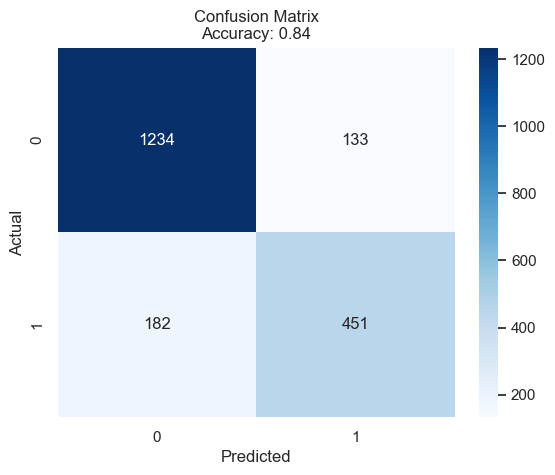

In [44]:
#Let's check the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

#Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## FINE TUNING (HYPERPARAMETER) 🚀🚀 

In [45]:
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ['l1', 'l2'],
    "fit_intercept": [True, False],
    "class_weight": [None, 'balanced']
}


In [47]:
grid = GridSearchCV(estimator=my_model, param_grid=param_grid, cv=5, scoring='accuracy', refit=True, verbose=3)
model_grid = grid.fit(X_train, y_train) # actually executing the grid search

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.836 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.841 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.854 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.847 total time=   0.0s
[CV 5/5] END C=0.1, c

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 2/5] END C=0.1, class_weight=None, fit_intercept=False, penalty=l2;, score=0.761 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, fit_intercept=False, penalty=l2;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, fit_intercept=False, penalty=l2;, score=0.762 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, fit_intercept=False, penalty=l2;, score=0.760 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, fit_intercept=Tr

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 5/5] END C=0.1, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.829 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.738 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.762 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.764 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 1/5] END C=1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.836 total time=   0.0s
[CV 2/5] END C=1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.843 total time=   0.0s
[CV 3/5] END C=1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.853 total time=   0.0s
[CV 4/5] END C=1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.846 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, fit_intercept=True, penalty=l2;, score=0.842 total time=   0.0s
[CV 1/5] END C=1, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 4/5] END C=1, class_weight=None, fit_intercept=False, penalty=l2;, score=0.762 total time=   0.0s
[CV 5/5] END C=1, class_weight=None, fit_intercept=False, penalty=l2;, score=0.760 total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.808 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.819 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, fit_intercept=True, penalty=l2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 1/5] END C=1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.739 total time=   0.0s
[CV 2/5] END C=1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.762 total time=   0.0s
[CV 3/5] END C=1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.764 total time=   0.0s
[CV 4/5] END C=1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.761 total time=   0.0s
[CV 5/5] END C=1, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.760 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=None, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight=None, fit_intercept=True, penalty=l1;,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 3/5] END C=10, class_weight=None, fit_intercept=True, penalty=l2;, score=0.853 total time=   0.0s
[CV 4/5] END C=10, class_weight=None, fit_intercept=True, penalty=l2;, score=0.847 total time=   0.0s
[CV 5/5] END C=10, class_weight=None, fit_intercept=True, penalty=l2;, score=0.842 total time=   0.0s
[CV 1/5] END C=10, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END C=10, class_weight=None, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight=None, fit_intercept=False, penalty=l2;, score=0.740 total time=   0.0s
[CV 2/5] END C=10, class_weight=None, fit_intercept=False, penalty=l2;, score=0.761 to

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 5/5] END C=10, class_weight=balanced, fit_intercept=True, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=10, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.808 total time=   0.0s
[CV 2/5] END C=10, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.819 total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.827 total time=   0.0s
[CV 4/5] END C=10, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.824 total time=   0.0s
[CV 5/5] END C=10, class_weight=balanced, fit_intercept=True, penalty=l2;, score=0.828 total time=   0.0s
[CV 1/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END C=10, class_weight=balanced, fit_inter

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

[CV 2/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.762 total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.765 total time=   0.0s
[CV 4/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.761 total time=   0.0s
[CV 5/5] END C=10, class_weight=balanced, fit_intercept=False, penalty=l2;, score=0.760 total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the fai

In [48]:
# Take the best model (refitted on the whole training set), then test it
model = model_grid.best_estimator_ # retrieve the best-performing model found during the grid search
y_pred = model.predict(X_test) # make predictions on the test data

In [49]:
#Re-printing Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

#Re-printing Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2%}".format(precision))

#Re-printing Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2%}".format(recall))

#Re-printing F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 84.30%
Precision: 77.26%
Recall: 71.41%
F1 Score: 0.74


# FINAL REPORT 🧾🧾

The script developed in this project aims to build a classification model to predict whether a customer is likely to file a car insurance claim (1) or not (0). Throughout the project, several challenges were encountered, particularly during the **data preprocessing phase**, which proved both critical and complex. Key issues included handling missing data, performing **Exploratory Data Analysis (EDA)** to uncover trends and relationships, and executing effective **feature engineering** to enhance model performance.

After the dataset was cleaned and preprocessed, a **Logistic Regression** algorithm was applied to predict the target variable. The final model achieved an **accuracy of 84.30%**, with a **precision of 77.26%** and a **recall of 71.41%** on the test set. These metrics reflect a generally robust model, demonstrating a solid balance between **precision** (the ability to minimize false positives) and **recall** (the ability to capture true positives). Overall, the model provides reliable predictive performance, suitable for practical applications.

 **Additional steps**

Potential enhancements and additional steps that could be considered involve refining the **Cross-Validation Strategy** to bolster the model's robustness and ensure effective generalization to unseen data. Techniques like **Stratified K-Fold Cross-Validation** can ensure that class distribution is preserved across folds, which is particularly useful for imbalanced datasets. Additionally, incorporating **additional evaluation metrics**, such as the **Area Under the ROC Curve (AUC-ROC)**, can provide a more comprehensive assessment of the model's performance beyond accuracy, offering deeper insight into the model's ability to balance precision and recall.
Moreover, it is worth experimenting with different models to improve classification performance. **Random Forest** is an ensemble method that can capture complex interactions between features through a collection of decision trees. Similarly, **Support Vector Classifier (SVC)**, especially with a **non-linear kernel** like RBF, may be better suited for capturing non-linear relationships in the data. Both of these models can often yield better results than traditional algorithms depending on the nature of the dataset.
These refinements, along with evaluating multiple models and using diverse metrics, will contribute to a more thorough and nuanced assessment of the classification model’s overall effectiveness.

